In [8]:
import numpy as np
import matplotlib.pyplot as plt

1. Решите линейную систему

In [9]:
A = np.array([[1, 2, 3], 
              [4, 0, 6],
              [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

## Домашнее задание: найдите псевдорешение системы
### $x + 2y - z = 1$
### $3x - 4y = 7$
### $8x - 5y +2z = 12$
### $2x - 5z = 7$
### $11x + 4y - 7z= 15$

In [10]:
A = np.array([[1, 2, -1], 
              [3, -4, 0],
              [8, -5, 2],
              [2, 0, -5],
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

## Сколько решений имеет линейная система:
$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\end{array}
\right)\cdot 
X
 = \left(\begin{array}{cccc}
12\\2\\1\end{array}\right)$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

СЛАУ совместна тогда и только тогда, когда ранг ее основной матрицы равен рангу ее расширенной матрицы

In [11]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[12, 2, 1]])
print("A =", A)
print(f"Определитель матрицы A = {np.linalg.det(A)}")
print(f"Ранг матрицы А = {np.linalg.matrix_rank(A, 0.0001)}")

A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
Определитель матрицы A = -9.51619735392994e-16
Ранг матрицы А = 2


In [12]:
C = np.concatenate((A, B.T), axis=1)
print("Расширенная матрица C =")
print(C)
print("Ранг матрицы C =", np.linalg.matrix_rank(C, 0.0001))

Расширенная матрица C =
[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
Ранг матрицы C = 3


По теореме Кронекера-Капелли:

Если ранг исходной матрицы меньше ранга расширенной матрицы, то такая система не имеет ни одного решения.

Если ранги равны, то система имеет решения.

Система имеет единственное решение если ранг равен числу неизвестных.

Система имеет бесконечное множество решений если ранг меньше числа неизвестных.


Т.о. система не имеет ни одного решения. Докажем это:

In [13]:
print(np.linalg.solve(A,np.array([12, 2, 1])))

[ 2.83726777e+16 -5.67453553e+16  2.83726777e+16]


Получили нули. Изменим вектор правой части так, чтобы система стала совместной.

In [14]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(np.linalg.solve(A,np.array([1, 2, 3])))

[-0.23333333  0.46666667  0.1       ]


## Вычислите LU-разложение матрицы:
$\left(
\begin{array}{cccc}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73\end{array}\right)$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [15]:
import scipy 
import scipy.linalg

A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73] ])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

print(np.dot(P.transpose(), A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [16]:
print(np.linalg.solve(A,np.array([1, 2, 3])))

[ 1.01388889  0.03472222 -0.02777778]


## Найдите нормальное псевдорешение недоопределенной системы уравнений:

x + 2y – z = 1

8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум (т.е. будет наиболее близок к нулевому вектору (точке 0;0;0)).

Проверить себя при помощи возможностей Питона.

Недоопределенные СЛАУ - "вытянутые" прмоугольные, где кол-во неизвестных больше кол-ва уравнений

Решая систему уравнений, получаем:

y = 10/21*z - 4/21

z = 2.1*y + 0.4

Находим вектор с минимальной нормой:

Ответ: (array([ 1.38191882, -0.18081181,  0.0202952 ]), array([], dtype=float64), 2, array([9.65316119, 2.41173777]))


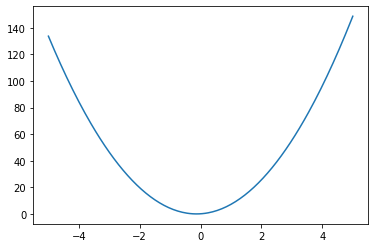

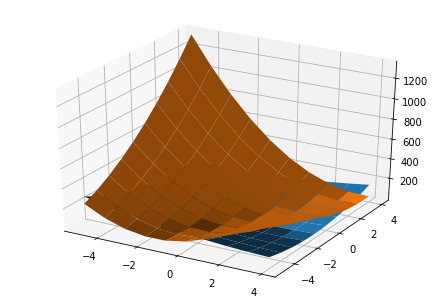

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x=np.linspace(-5,5,201)
plt.plot(x,Q(x,10/21*x - 4/21, 2.1*x + 0.4))

fig = figure()
ax = Axes3D(fig)
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
x, y = np.meshgrid(x, y)

ax.plot_surface(x, y, Q(x, y, x + 2*y - 1))
ax.plot_surface(x, y, Q(x, y, -4*x + 2.5*y + 6))
#ax.scatter(0,0,0,'z',50,'red')
#show()

A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

print(f'Ответ: {np.linalg.lstsq(A,B, rcond=-1)}')

Минимальная норма равна 0. Получается

10/21*0 - 4/21 = 4/21

21/10*0 + 0,4 = 0,4

0

$ x = 
\left(
\begin{array}{cccc}
4/21\\
0,4\\
0\end{array}\right)$

## Найдите одно из псевдорешений вырожденной системы:

$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\end{array}
\right)\cdot 
X
 = \left(\begin{array}{cccc}
2\\5\\11\end{array}\right)$

Попробуйте также отыскать и нормальное псевдорешение.

In [30]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [31]:
print(np.dot(Q, R))
print(np.dot(np.transpose(Q), Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.26517217e-16 -2.55176183e-16]
 [-5.26517217e-16  1.00000000e+00  3.37757775e-16]
 [-2.55176183e-16  3.37757775e-16  1.00000000e+00]]


In [32]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [33]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [34]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [35]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [36]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [37]:
X = np.array([1.5, 1, 0.5])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)

(1.8708286933869707, 15.297058540778355)